In [1]:
#pip install opencv-python

In [2]:
#img.shape -> imprimir la longitud de la matriz
#img -> imprimir la matriz
#show -> imprimir la imagen
#read -> leer la imagen


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print('log import libraries')

log import libraries


In [4]:
#mostrar imagen
show = lambda x: plt.imshow(x)
read = lambda x: cv2.imread(x)

#convertir imagen a escala de grises
def convert_to_grayscale(x):
    y = x
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            y[i, j] = sum(x[i, j])/3
    return y
def convert_grayscale_to_matrix(x):
    rows = x.shape[0]
    columns = x.shape[1]
    rows = 4
    columns = 5
    m = [[0] * columns for i in range(rows)]
    for i in range(rows):
        for j in range(columns):
            m[i][j] = x[i][j][0]
    return m

In [5]:
img = read('../Base/Train/c003_001.png')

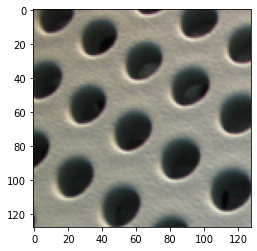

In [6]:
show(img)

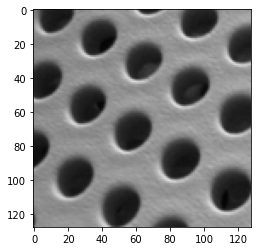

In [7]:
#convertir en escala de grises
img = convert_to_grayscale(img)
show(img)        

In [8]:
m = convert_grayscale_to_matrix(img) 

In [9]:
rows = 4
columns = 5

for i in range(rows):
    print(m[i])

print()
print()
print()
print()

for i in range(rows):
    for j in range(columns):
        if (i > 0 and i < rows - 1) and (j > 0 and j < columns - 1):
            print(m[i][j])
            

[125, 122, 108, 94, 75]
[123, 120, 112, 95, 69]
[126, 124, 113, 96, 72]
[128, 126, 118, 95, 69]




120
112
95
124
113
96
